In [1]:
import pandas as pd

movie=pd.read_csv("nlp2_data",encoding = 'utf_8_sig')
movie.head()


,Unnamed: 0,電影名稱,類型,上映時間,劇情介紹
0,0,一世狂野 Blow,劇情、犯罪、歷史/傳記,上映日期：2001-10-12,\n 喬治戎格一生都在追求所謂的美國夢，也就是享受美好富裕的生活，但是...
1,1,玩命關頭 The Fast and the Furious,動作、劇情、犯罪、懸疑/驚悚,上映日期：2001-10-13,\n 唐米尼杜洛托是洛城街頭賽車界的老大哥，他身邊有一群忠心耿耿的手下...
2,2,戰雲密佈 Storm Catcher,動作、犯罪、懸疑/驚悚、戰爭,上映日期：2001-10-13,\n 美國空軍最高機密的隱形戰機驚傳失蹤！祕密訓練的飛行軍官傑克，被誣...
3,3,騎士風雲錄 A Knight's Tale,動作、冒險、喜劇,上映日期：2001-10-19,\n 14世紀中古時期的社會階級分明，出身卑微的平民不論如何努力和奮鬥...
4,4,金法尤物 Legally Blonde,喜劇,上映日期：2001-10-19,\n 在【歡樂谷】、【危險性遊戲】挑大樑的瑞絲薇斯朋飾演【金法尤物】中...


In [2]:
#修改類型
for i in range(0,6000):
    type=''
    if str(movie['類型'][i])=='nan':
        continue
    for k in movie['類型'][i]:
        if str(k) !='、':
            type=type+str(k)
        else:
            break
    movie['類型'][i]=type




/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20882 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 38570 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 22855 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24187 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21127 missing from c

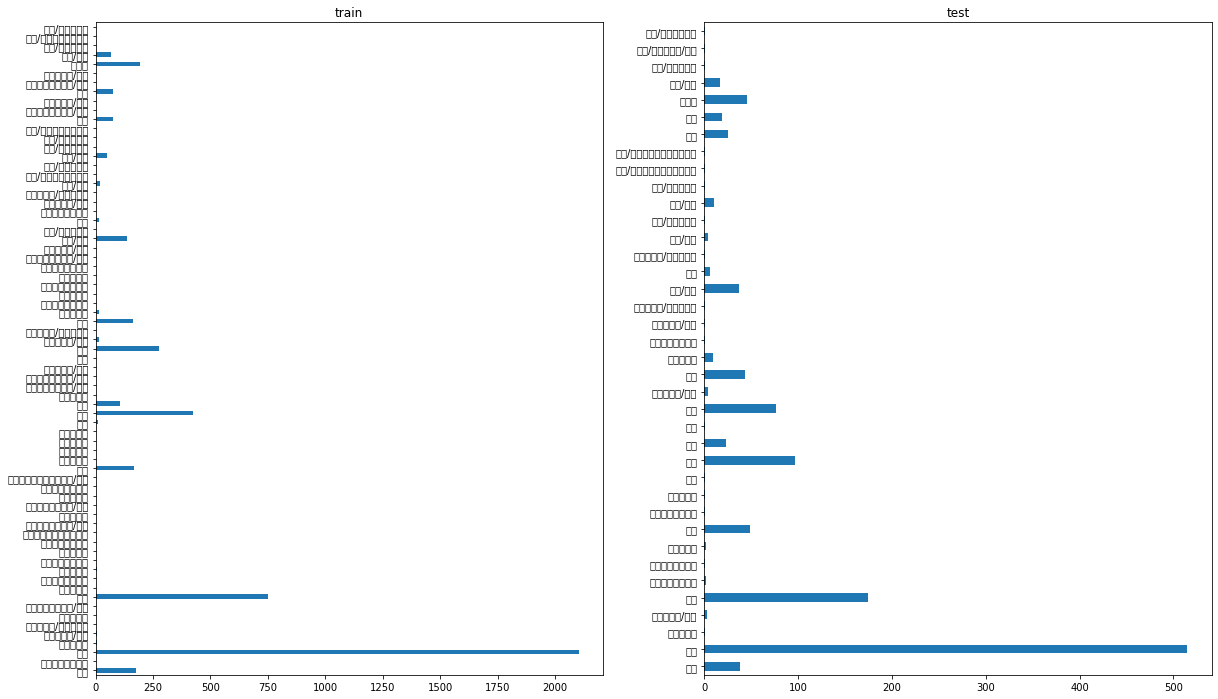

In [3]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

train,test= train_test_split(movie,test_size=0.2)
plt.figure( figsize = (20,12))
plt.subplot(1,2,1)
train["類型"].value_counts().sort_index().plot( kind = "barh", title = "train")
plt.subplot(1,2,2)
test["類型"].value_counts().sort_index().plot( kind = "barh", title = "test")

In [4]:
#處理劇情
import jieba
import jieba.analyse

def jieba_story(story):
    story.replace("\n","").replace("！","").replace("","，").replace("．","").replace("、","").replace("【","").replace("】","「").replace("」","").replace("（","").replace("）","").replace("★","").replace("\r\n","")
    return " ".join(list(jieba.analyse.extract_tags(story,topK=2)))

In [7]:
#df1
movie["jieba_story"]=movie["劇情介紹"].map(jieba_story)
movie_df1={'type':movie['類型'],'story':movie['jieba_story']}
df1=pd.DataFrame(movie_df1)
df1['key'] = df1['type'].astype(str)+' '+df1['story'].astype(str)